In [1]:
# 1장 둘러보기

# 텍스트 분류

from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [8]:
#  분류 대상
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [9]:
# 텍스트 분류

import pandas as pd 

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901547


In [11]:
# ner

ner_tagger = pipeline("ner")

outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


,entity,score,index,word,start,end
0,I-ORG,0.879010,2,Amazon,5,11
1,I-MISC,0.994601,9,Op,36,38
2,I-MISC,0.987668,10,##ti,38,40
3,I-MISC,0.992774,11,##mus,40,43
4,I-MISC,0.988392,12,Prime,44,49
5,I-LOC,0.999755,20,Germany,90,97
6,I-MISC,0.556570,44,Mega,208,212
7,I-PER,0.590256,45,##tron,212,216
8,I-ORG,0.654192,54,Dec,253,256
9,I-ORG,0.685193,55,##ept,256,259


![transformerProcess](https://camo.githubusercontent.com/91f07ff7f213596a0d1518aca8b328152e34b0b930cc40fd51fda5ecbef04b2d/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230325f68662d6c69627261726965732e706e673f7261773d31)

In [2]:
# 데이터셋 가져와보기

from datasets import load_dataset


emotions = load_dataset("SetFit/emotion")

Using custom data configuration SetFit___emotion-89147fdf376d67e2
Reusing dataset json (C:\Users\Harvester-PC\.cache\huggingface\datasets\json\SetFit___emotion-89147fdf376d67e2\0.0.0\c2d554c3377ea79c7664b93dc65d0803b45e3279000f993c7bfd18937fd7f426)


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [12]:
# SetFit/emotion 데이터셋의 경우 수동으로 ClassLabel 객체를 만들어 label에 할당합니다.
from datasets import ClassLabel

emotions['train'].features['label'] = ClassLabel(
    num_classes=6, 
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [13]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [14]:
emotions["train"].features['label'].__class__

datasets.features.features.ClassLabel

In [15]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_text,label_name
0,i didnt feel humiliated,0,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love
4,i am feeling grouchy,3,anger,anger


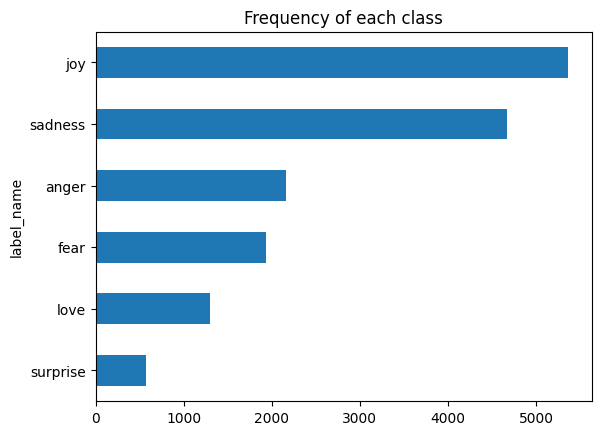

In [16]:
# 클래스 분포 살펴보기

import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of each class")
plt.show()

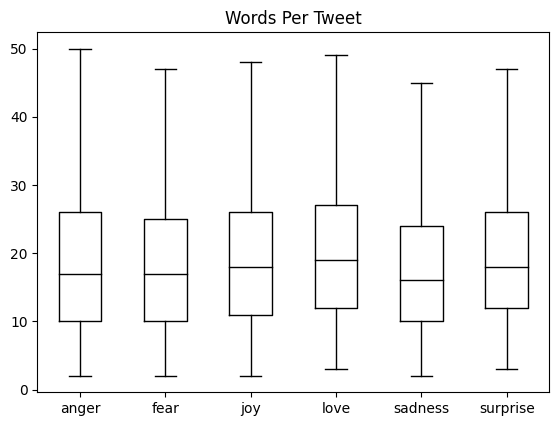

In [20]:
# 트윗의 길이 확인

df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [29]:
# 텍스트 -> 토큰

# 문자 토큰
text = "Tokenizing Text is core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 'T', 'e', 'x', 't', ' ', 'i', 's', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [30]:
# Numericalization -> 각 토큰을 고유한 정수로 인코딩
token2idx = {ch: idx for idx, ch in enumerate(set(tokenized_text))}
print(token2idx)

{'n': 0, 'z': 1, '.': 2, 'L': 3, 'f': 4, 'x': 5, 'k': 6, 'o': 7, 'T': 8, 'i': 9, 'a': 10, 'N': 11, ' ': 12, 'e': 13, 't': 14, 'c': 15, 'r': 16, 's': 17, 'P': 18, 'g': 19}


In [31]:
# vocabalary에 있는 각 문자를 고유한 정수로 바꾸는 매핑 딕셔너리
# token2idx를 사용해 토큰화된 텍스트를 정수 리스트로 변환

input_ids = [token2idx[token] for token in tokenized_text]

print(input_ids)

[8, 7, 6, 13, 0, 9, 1, 9, 0, 19, 12, 8, 13, 5, 14, 12, 9, 17, 12, 15, 7, 16, 13, 12, 14, 10, 17, 6, 12, 7, 4, 12, 11, 3, 18, 2]


In [32]:
# One-hot Vector - 머신러닝에서 ordinal(순서) 또는 nominal(명목) 범주 데이터를 인코딩 하기 위해 자주 사용
# 트랜스포머 시리즈 캐릭터 인코딩

categorical_df = pd.DataFrame(
    {"Name":["Bumblebee", "Optimus Prime", "Megatron"],"Label ID":[0,1,2]}
)
print(categorical_df)

            Name  Label ID
0      Bumblebee         0
1  Optimus Prime         1
2       Megatron         2


In [33]:
# 이 방식은 이름 사이 가상의 순서가 만들어진다는 문제 존재
# 신경망은 이런 종류 관ㅖ를 학습하는 능력 뛰어남
# 범주마다 새 열을 만들어 이름이 범주에 해당되는 경우 1, 아니면 0 할당

pd.get_dummies(categorical_df["Name"])

# 이렇게 생성된 행이 원-핫 벡터

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [34]:
# 두개의 원핫 인코딩을 더한 결과는 쉽게 해석됨.

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids,num_classes=len(token2idx))
print(one_hot_encodings.shape)

torch.Size([36, 20])


In [35]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스:{input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스:8
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [36]:
# 단어 토큰화 word tokenization
# 토큰화를 하며 텍스트의 구조를 유지하는 간단한 방법
# 텍스트를 문자가 아닌 단어로 분할한 후 정수로 매핑

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'Text', 'is', 'core', 'task', 'of', 'NLP.']


In [37]:
# 부분 단어 토큰화
# 기본적으로 문자 토큰화 및 단어 토큰화의 장점을 결합
# 트랜스포머는 AutoTokenizer 클래스를 제공

from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [38]:
# AutoToknizer클래스는 체크포인트 이름을 통해 모델의 설정 pretrained된 가중치
# 어휘사전을 자동으로 추출하는 자동 클래스

from transformers import AutoTokenizer

distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [39]:
# 문자 토큰화 처럼 단어가 input_ids 필드에 있는 고유한 정수에 매핑됨
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [41]:
# 텍스트 분류모델 학습하기

# 사전 훈련된 모델 사용
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
# 쿠다 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
# 마지막 은닉 상태 추출하기
text = "this is a test"
# 텐서로 반환하도록 지정
inputs = tokenizer(text,return_tensors="pt")

print(f"입력 텐서 크기 :{inputs['input_ids'].size()}")

입력 텐서 크기 :torch.Size([1, 6])


In [45]:
# 결과 텐서의 크기는 [batch_size,n_tokens]
# 인코딩을 텐서로 준비했으므로, 마지막 단계로 이를 모델이 있는 장치로 옮기고 입력으로 전달


inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    # 그래디언트 계산 비활성화
    # - 계산에 필요한 메모리 양이 줄어 추론에 유리함
    outputs = model(**inputs)
    
print(outputs)

# 마지막 은닉 상태의 크기
# 은닉 상태의 크기는 [batch_size,n_tokens,hidden_size]
# 6개의 입력 토큰마다 768차원의 벡터를 반환
print(outputs.last_hidden_state.size())

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)
torch.Size([1, 6, 768])


In [ ]:
#분류 작업에서는 보통 [CLS]토큰에 연관된 은닉 상태를 입력 특성으로 사용
# 이 토큰은 시퀀스 시작에 등장하므로 다음과 같이 인덱스 지정하여 추출

